# Simulating Fermentation with iJL1678b (ECOLIme)

## 1. Load the python packages

In [1]:
from __future__ import print_function, division, absolute_import

# python imports
import re
from os.path import join
from collections import defaultdict
import pickle
import pandas as pd

# third party imports
import pandas
import tabulate
import cobra
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',100)
pd.set_option('display.max_colwidth',300)

# ECOLIme
import ecolime
from ecolime import (transcription, translation, flat_files, generics, formulas, compartments)

# COBRAme
import cobrame
from cobrame.util import building, mu, me_model_interface
#from cobrame.io.json import save_json_me_model, save_reduced_json_me_model

/usr/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/solvers/__init__.py:63: UserWarning: No LP solvers found
  warn("No LP solvers found")
/usr/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/io/sbml3.py:24: UserWarning: Install lxml for faster SBML I/O
  warn("Install lxml for faster SBML I/O")
/usr/lib/python3.6/site-packages/cobra-0.5.11-py3.6-linux-x86_64.egg/cobra/io/__init__.py:12: UserWarning: cobra.io.sbml requires libsbml
  warn("cobra.io.sbml requires libsbml")


## 2. Load the iJL1678b model

Load the iJL1678b model in pickle format that is located in the current directory.

In [2]:
with open('iJL1678b.pickle', 'rb') as f:
    me = pickle.load(f)

## 3. Define ME-Model Solve Functions

In [3]:
def solve_me_model(me, max_mu, precision=1e-6, min_mu=0, using_soplex=False,
                  compiled_expressions=None):
    if using_soplex:
        from cobrame.solve.algorithms import binary_search
        binary_search(me, min_mu=min_mu, max_mu=max_mu, debug=True, mu_accuracy=precision,
                      compiled_expressions=compiled_expressions)
    else:
        from qminospy.me1 import ME_NLP1
        # The object containing solveME methods--composite that uses a ME model object 
        me_nlp = ME_NLP1(me, growth_key='mu')
        # Use bisection for now (until the NLP formulation is worked out)
        muopt, hs, xopt, cache = me_nlp.bisectmu(precision=precision, mumax=max_mu)
        me.solution.f = me.solution.x_dict['biomass_dilution']
        
def show_escher_map(me, solution=None):
    import escher
    view = escher.Builder("iJO1366.Central metabolism")
    view.reaction_data = me.get_metabolic_flux(solution=solution)
    return view

## Simulate Fermentation

In [4]:
x = range(0, 30, 2)
x

range(0, 30, 2)

In [5]:
o2 = [0, -2, -4, -6, -8, -10, -15, -20]
growth_rate = []
acetate = []
ethanol = []
formate = []
acald = []
protons = []
co2 = []
glucose = []
oxygen = []
lactate = []

#me.reactions.get_by_id('EX_glc__D_e').lower_bound = -10
#me.reactions.get_by_id('EX_glc__D_e').upper_bound = -10

for x in range(0,-20,-2):
    print('\nOxygen Flux # ',x)
    me.reactions.get_by_id('EX_o2_e').lower_bound = x
    me.reactions.get_by_id('EX_o2_e').upper_bound = x
    solve_me_model(me, 1., min_mu = .1, precision=1e-2, using_soplex=False)
    growth_rate.append(me.solution.f)
    acetate.append(me.reactions.EX_ac_e.x)
    ethanol.append(me.reactions.EX_etoh_e.x)
    formate.append(me.reactions.EX_for_e.x)
    acald.append(me.reactions.EX_acald_e.x)
    protons.append(me.reactions.EX_h_e.x)
    co2.append(me.reactions.EX_co2_e.x)
    glucose.append(me.reactions.EX_glc__D_e.x)
    oxygen.append(x)
    lactate.append(me.reactions.EX_lac__D_e.x)
    
growth_rate


Oxygen Flux #  0
iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 34.638751 seconds
Finished substituting S,lb,ub in 2.373890 seconds
Finished makeME_LP in 0.377450 seconds
Getting MINOS parameters from ME_NLP...
1 0.5 0.5 1.0 0.5 optimal
Finished substituting S,lb,ub in 2.201858 seconds
Finished makeME_LP in 0.359842 seconds
Getting MINOS parameters from ME_NLP...
2 0.5 0.5 0.75 0.75 1
Finished substituting S,lb,ub in 2.195174 seconds
Finished makeME_LP in 0.357697 seconds
Getting MINOS parameters from ME_NLP...
3 0.5 0.5 0.625 0.625 1
Finished substituting S,lb,ub in 2.200748 seconds
Finished makeME_LP in 0.354206 seconds
Getting MINOS parameters from ME_NLP...
4 0.5625 0.5625 0.625 0.5625 optimal
Finished substituting S,lb,ub in 2.195591 seconds
Finished makeME_LP in 0.357131 seconds
Getting MINOS parameters from ME_NLP...
5 0.5625 0.5625 0.59375 0.59375 1
Finished substituting S,lb,ub in 2.224936 seconds
Finished makeME_LP in 0.363719 seconds
Getting

Finished makeME_LP in 0.373832 seconds
Getting MINOS parameters from ME_NLP...
3 0.75 0.75 0.875 0.875 1
Finished substituting S,lb,ub in 2.399045 seconds
Finished makeME_LP in 0.375114 seconds
Getting MINOS parameters from ME_NLP...
4 0.75 0.75 0.8125 0.8125 1
Finished substituting S,lb,ub in 2.384439 seconds
Finished makeME_LP in 0.359565 seconds
Getting MINOS parameters from ME_NLP...
5 0.78125 0.78125 0.8125 0.78125 optimal
Finished substituting S,lb,ub in 2.366208 seconds
Finished makeME_LP in 0.361325 seconds
Getting MINOS parameters from ME_NLP...
6 0.796875 0.796875 0.8125 0.796875 optimal
Finished substituting S,lb,ub in 2.348699 seconds
Finished makeME_LP in 0.362698 seconds
Getting MINOS parameters from ME_NLP...
7 0.796875 0.796875 0.8046875 0.8046875 1
Bisection done in 130.533 seconds

Oxygen Flux #  -14
iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 31.928545 seconds
Finished substituting S,lb,ub in 2.278503 seconds
Finished makeME_LP in 

[0.5859375,
 0.625,
 0.6640625,
 0.6953125,
 0.7265625,
 0.765625,
 0.796875,
 0.8203125,
 0.828125,
 0.828125]

In [6]:
oxygen

[0, -2, -4, -6, -8, -10, -12, -14, -16, -18]

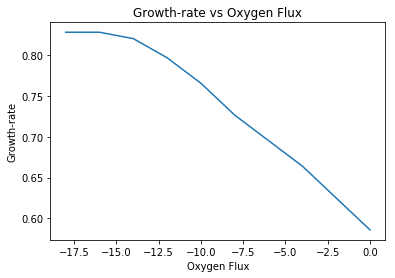

In [7]:
import matplotlib.pyplot as plt

# x axis values
x = oxygen
y = growth_rate
  
# plotting the points 
plt.plot(x, growth_rate, label = "Growth Rate")

# naming the x axis
plt.xlabel('Oxygen Flux')
# naming the y axis
plt.ylabel('Growth-rate')
  
# giving a title to my graph
plt.title('Growth-rate vs Oxygen Flux')
  
# function to show the plot
plt.show()

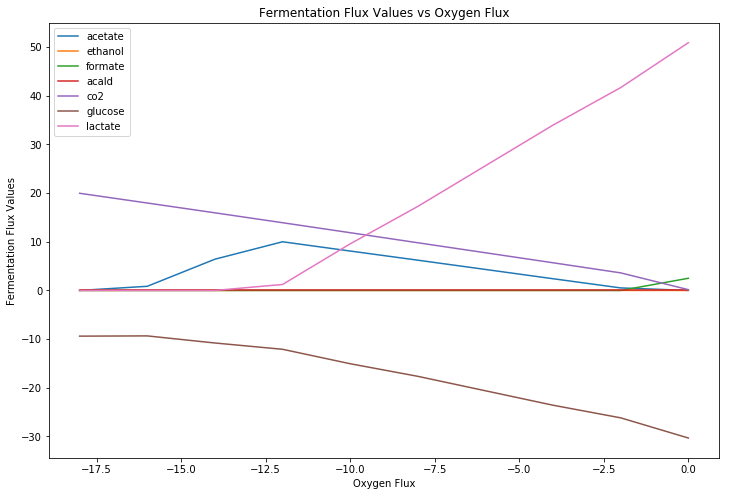

In [9]:
# x axis values
x = range(0,-20,-2)
# corresponding y axis values
y = growth_rate

plt.figure(figsize=(12,8))

# plotting the points 
plt.plot(x, acetate, label = "acetate")
plt.plot(x, ethanol, label = "ethanol")
plt.plot(x, formate, label = "formate")
plt.plot(x, acald, label = "acald")
plt.plot(x, co2, label = "co2")
plt.plot(x, glucose, label = "glucose")
#plt.plot(x, protons, label = "protons")
plt.plot(x,lactate, label = "lactate")

# naming the x axis
plt.xlabel('Oxygen Flux')
# naming the y axis
plt.ylabel('Fermentation Flux Values')
  
# giving a title to my graph
plt.title('Fermentation Flux Values vs Oxygen Flux')
  
# function to show the plot
plt.legend()
#plt.yscale('log')
plt.show()

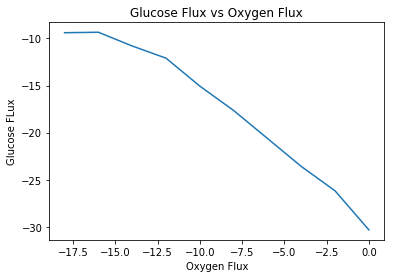

In [10]:
import matplotlib.pyplot as plt
  
# x axis values
#x = glycerol
# corresponding y axis values
y = glucose
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Oxygen Flux')
# naming the y axis
plt.ylabel('Glucose FLux')
  
# giving a title to my graph
plt.title('Glucose Flux vs Oxygen Flux')
  
# function to show the plot
plt.show()

In [11]:
o2 = [0, -2, -4, -6, -8, -10, -15, -20]
growth_rate2 = []
acetate2 = []
ethanol2 = []
formate2 = []
acald2 = []
protons2 = []
co2_2 = []
glucose2 = []
oxygen2 = []
lactate2 = []

me.reactions.get_by_id('EX_glc__D_e').lower_bound = -10

for x in range(0,-20,-2):
    print('\nOxygen Flux # ',x)
    me.reactions.get_by_id('EX_o2_e').lower_bound = x
    me.reactions.get_by_id('EX_o2_e').upper_bound = x
    solve_me_model(me, 1., min_mu = .1, precision=1e-2, using_soplex=False)
    growth_rate2.append(me.solution.f)
    acetate2.append(me.reactions.EX_ac_e.x)
    ethanol2.append(me.reactions.EX_etoh_e.x)
    formate2.append(me.reactions.EX_for_e.x)
    acald2.append(me.reactions.EX_acald_e.x)
    protons2.append(me.reactions.EX_h_e.x)
    co2_2.append(me.reactions.EX_co2_e.x)
    glucose2.append(me.reactions.EX_glc__D_e.x)
    oxygen2.append(x)
    lactate2.append(me.reactions.EX_lac__D_e.x)
    
growth_rate2


Oxygen Flux #  0
iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 34.021545 seconds
Finished substituting S,lb,ub in 2.338323 seconds
Finished makeME_LP in 0.370865 seconds
Getting MINOS parameters from ME_NLP...
1 0.0 0.0 0.5 0.5 1
Finished substituting S,lb,ub in 2.275730 seconds
Finished makeME_LP in 0.373877 seconds
Getting MINOS parameters from ME_NLP...
2 0.25 0.25 0.5 0.25 optimal
Finished substituting S,lb,ub in 2.318202 seconds
Finished makeME_LP in 0.366249 seconds
Getting MINOS parameters from ME_NLP...
3 0.25 0.25 0.375 0.375 1
Finished substituting S,lb,ub in 2.238250 seconds
Finished makeME_LP in 0.358191 seconds
Getting MINOS parameters from ME_NLP...
4 0.3125 0.3125 0.375 0.3125 optimal
Finished substituting S,lb,ub in 2.247878 seconds
Finished makeME_LP in 0.368925 seconds
Getting MINOS parameters from ME_NLP...
5 0.3125 0.3125 0.34375 0.34375 1
Finished substituting S,lb,ub in 2.284976 seconds
Finished makeME_LP in 0.366586 seconds
Gett

Finished substituting S,lb,ub in 2.206021 seconds
Finished makeME_LP in 0.357016 seconds
Getting MINOS parameters from ME_NLP...
4 0.75 0.75 0.8125 0.8125 1
Finished substituting S,lb,ub in 2.235879 seconds
Finished makeME_LP in 0.360932 seconds
Getting MINOS parameters from ME_NLP...
5 0.75 0.75 0.78125 0.78125 1
Finished substituting S,lb,ub in 2.210651 seconds
Finished makeME_LP in 0.358948 seconds
Getting MINOS parameters from ME_NLP...
6 0.765625 0.765625 0.78125 0.765625 optimal
Finished substituting S,lb,ub in 2.221790 seconds
Finished makeME_LP in 0.357000 seconds
Getting MINOS parameters from ME_NLP...
7 0.765625 0.765625 0.7734375 0.7734375 1
Bisection done in 129.229 seconds

Oxygen Flux #  -14
iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 32.054150 seconds
Finished substituting S,lb,ub in 2.187402 seconds
Finished makeME_LP in 0.359748 seconds
Getting MINOS parameters from ME_NLP...
1 0.5 0.5 1.0 0.5 optimal
Finished substituting S,lb,ub in

[0.3125,
 0.421875,
 0.5078125,
 0.5859375,
 0.65625,
 0.71875,
 0.765625,
 0.8125,
 0.828125,
 0.828125]

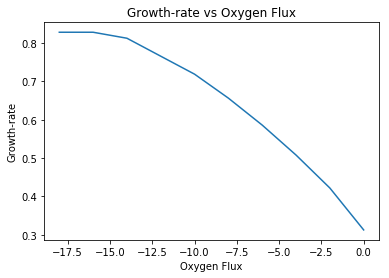

In [12]:
import matplotlib.pyplot as plt

# x axis values
x = oxygen2
y = growth_rate2
  
# plotting the points 
plt.plot(x, growth_rate2, label = "Growth Rate")

# naming the x axis
plt.xlabel('Oxygen Flux')
# naming the y axis
plt.ylabel('Growth-rate')
  
# giving a title to my graph
plt.title('Growth-rate vs Oxygen Flux')
  
# function to show the plot
plt.show()

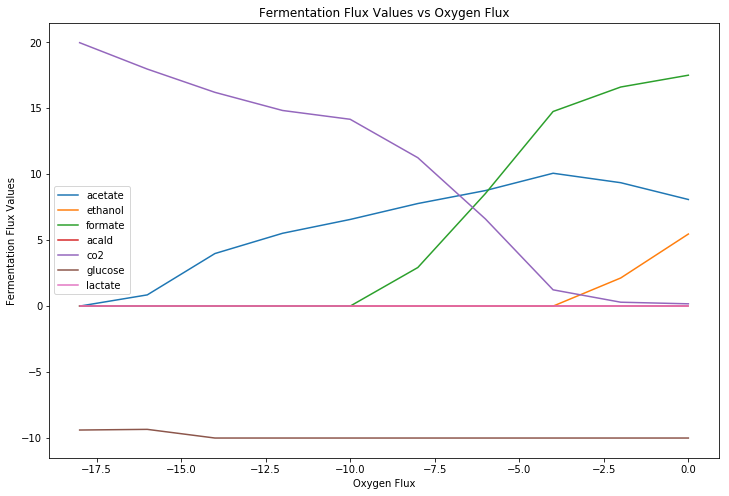

In [13]:
# x axis values
x = range(0,-20,-2)
# corresponding y axis values
y = growth_rate2

plt.figure(figsize=(12,8))

# plotting the points 
plt.plot(x, acetate2, label = "acetate")
plt.plot(x, ethanol2, label = "ethanol")
plt.plot(x, formate2, label = "formate")
plt.plot(x, acald2, label = "acald")
plt.plot(x, co2_2, label = "co2")
plt.plot(x, glucose2, label = "glucose")
#plt.plot(x, protons2, label = "protons")
plt.plot(x,lactate2, label = "lactate")

# naming the x axis
plt.xlabel('Oxygen Flux')
# naming the y axis
plt.ylabel('Fermentation Flux Values')
  
# giving a title to my graph
plt.title('Fermentation Flux Values vs Oxygen Flux')
  
# function to show the plot
plt.legend()
#plt.yscale('log')
plt.show()